### NHS Data Analytics using Python

In [3]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from datetime import datetime
import datetime

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.shape)
print(ad.columns)
ad.head()

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [5]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]

ad_na.shape

(0, 8)

In [6]:
# Determine the metadata of the data set.
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [7]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)
print(ar.columns)
ar.head()

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [8]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]

ar_na.shape

(0, 7)

In [9]:
# Determine the metadata of the data set.
ar.dtypes

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
print(nc.shape)
print(nc.columns)
nc.head()

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]

nc_na.shape

(0, 8)

In [12]:
# Determine the metadata of the data set.
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

### Explore the data set

**Question 1:** How many locations are there in the data set?

In [13]:
# Determine the number of locations.
unique_location_count = nc.sub_icb_location_name.nunique()
print(f"Number of Sub-ICB locations: {unique_location_count}")

Number of Sub-ICB locations: 106


**Question 2:** What are the five locations with the highest number of appointments?



In [14]:
# Determine the top five locations based on record count.
top_five_locations = nc.sub_icb_location_name.value_counts().head(5)
print("Top 5 Sub-ICB location by frequency:")
print(top_five_locations)

Top 5 Sub-ICB location by frequency:
sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [15]:
# Determine the number of service settings.
service_setting_count = nc.service_setting.nunique()
print(f"Number of service settings: {service_setting_count}")

#Print the name of each service setting.
service_setting = nc.service_setting.value_counts().head()
print(service_setting)

Number of service settings: 5
service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64


In [16]:
# Determine the number of context types.
context_type = nc.context_type.nunique()
print(f"Number of context types: {context_type}")

Number of context types: 3


In [17]:
# Determine the number of national categories.
national_category = nc.national_category.nunique()
print(f"Number of national categories: {national_category}")

Number of national categories: 18


In [18]:
# Determine the number of appointment statuses.
appointment_status = ar.appointment_status.nunique()
print(f"Number of appointment statuses: {appointment_status}")

#Print the name of each appointment status.
as_name = ar.appointment_status.value_counts().head()
print(as_name)

Number of appointment statuses: 3
appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64


### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [19]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [20]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [21]:
# Change the date format of ad['appointment_date'].

#Step 1: Convert 'appointment_date' column to datetime object.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

#Step 2: Format the 'appointment_date' datetime object to Y-M-D
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%Y-%m-%d')

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [22]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min_date = ad['appointment_date'].min()
ad_max_date = ad['appointment_date'].max()

# Use appropriate docstrings.
print(f"Minimum date: {ad_min_date}")
print(f"Maximum date: {ad_max_date}")

Minimum date: 2021-12-01
Maximum date: 2022-06-30


In [23]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min_date = nc['appointment_date'].min()
nc_max_date = nc['appointment_date'].max()

# Use appropriate docstrings.
print(f"Minimum date: {nc_min_date}")
print(f"Maximum date: {nc_max_date}")

Minimum date: 2021-08-01 00:00:00
Maximum date: 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [24]:
# For each of these service settings, determine the number of records available for the period and the location. 
#Subset the data to filter for NHS North West London and date range 
nc_filter = (
    (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (nc['appointment_date'] >= '2022-01-01') & 
    (nc['appointment_date'] <= '2022-06-01'))

nc_subset = nc[nc_filter]

#Find the most frequest service setting
most_popular_service = (
    nc_subset['service_setting'].value_counts())

# View the output.
print(f"The most popular service setting was: {most_popular_service}")

The most popular service setting was: service_setting
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: count, dtype: int64


**Question 3:** Which month had the highest number of appointments?

In [25]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
nc['Year'] = nc['appointment_date'].dt.year
nc['Month'] = nc['appointment_date'].dt.month

# Group by year and month, then sum appointment counts 
monthly_counts = (
    nc.groupby(['Year','Month'])['count_of_appointments'].sum().sort_values(ascending=False))

# Identifying row with index 0 as month with highest number of appointments
most_appointments = monthly_counts.index[0]
highest_count = monthly_counts.iloc[0]

print(f"Month with the highest number of appointments: {most_appointments[1]:02d}-{most_appointments[0]} ({highest_count} appointments)")

Month with the highest number of appointments: 11-2021 (30405070 appointments)


# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [26]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [27]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

In [28]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


**Service settings:**

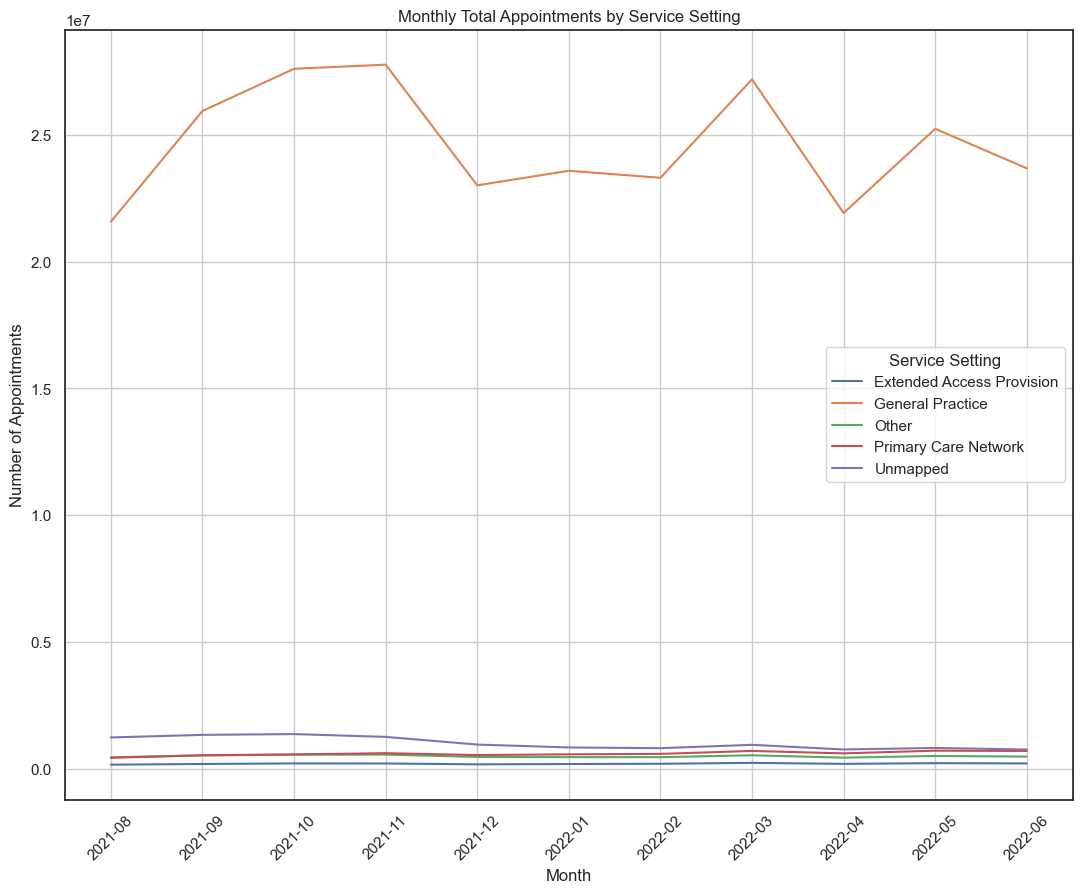

In [29]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

# Set the white plot style
sns.set_style("white")

# Plot total appointments per month by service setting
plt.figure(figsize=(13, 10))
sns.lineplot(data=nc_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Monthly Total Appointments by Service Setting')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Service Setting')
plt.grid(True)

# Save as PNG 
plt.savefig('monthly_total_appointments_by_service_setting.png', dpi=300)

# Show plot
plt.show()

**Context types:**

In [30]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ct.head()

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135


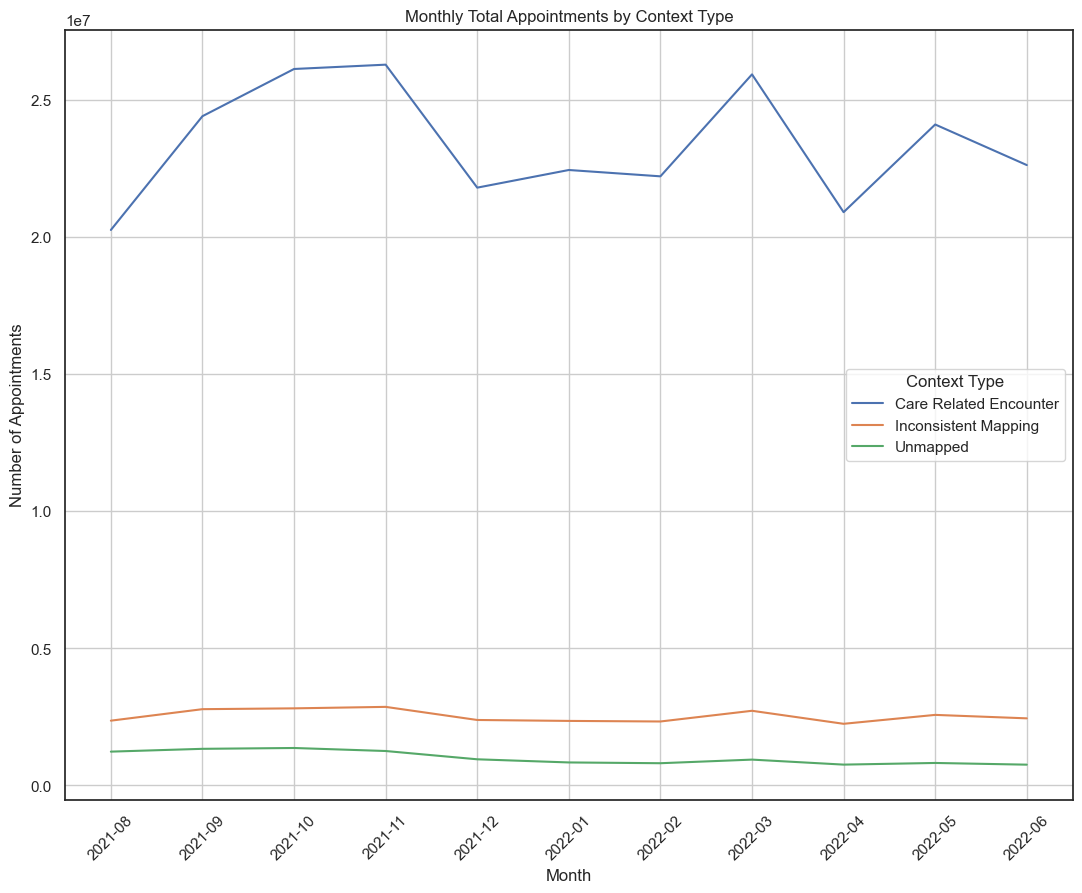

In [31]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

# Set the white plot style
sns.set_style("white")

# Plot total appointments per month by context type
plt.figure(figsize=(13, 10))
sns.lineplot(data=nc_ct, x='appointment_month', y='count_of_appointments', hue='context_type')

plt.title('Monthly Total Appointments by Context Type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Context Type')
plt.grid(True)

# Save as PNG 
plt.savefig('monthly_appointments_context_type.png', dpi=300)

# Show plot
plt.show()

**National categories:**

In [32]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View output.
nc_nc.head()

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045


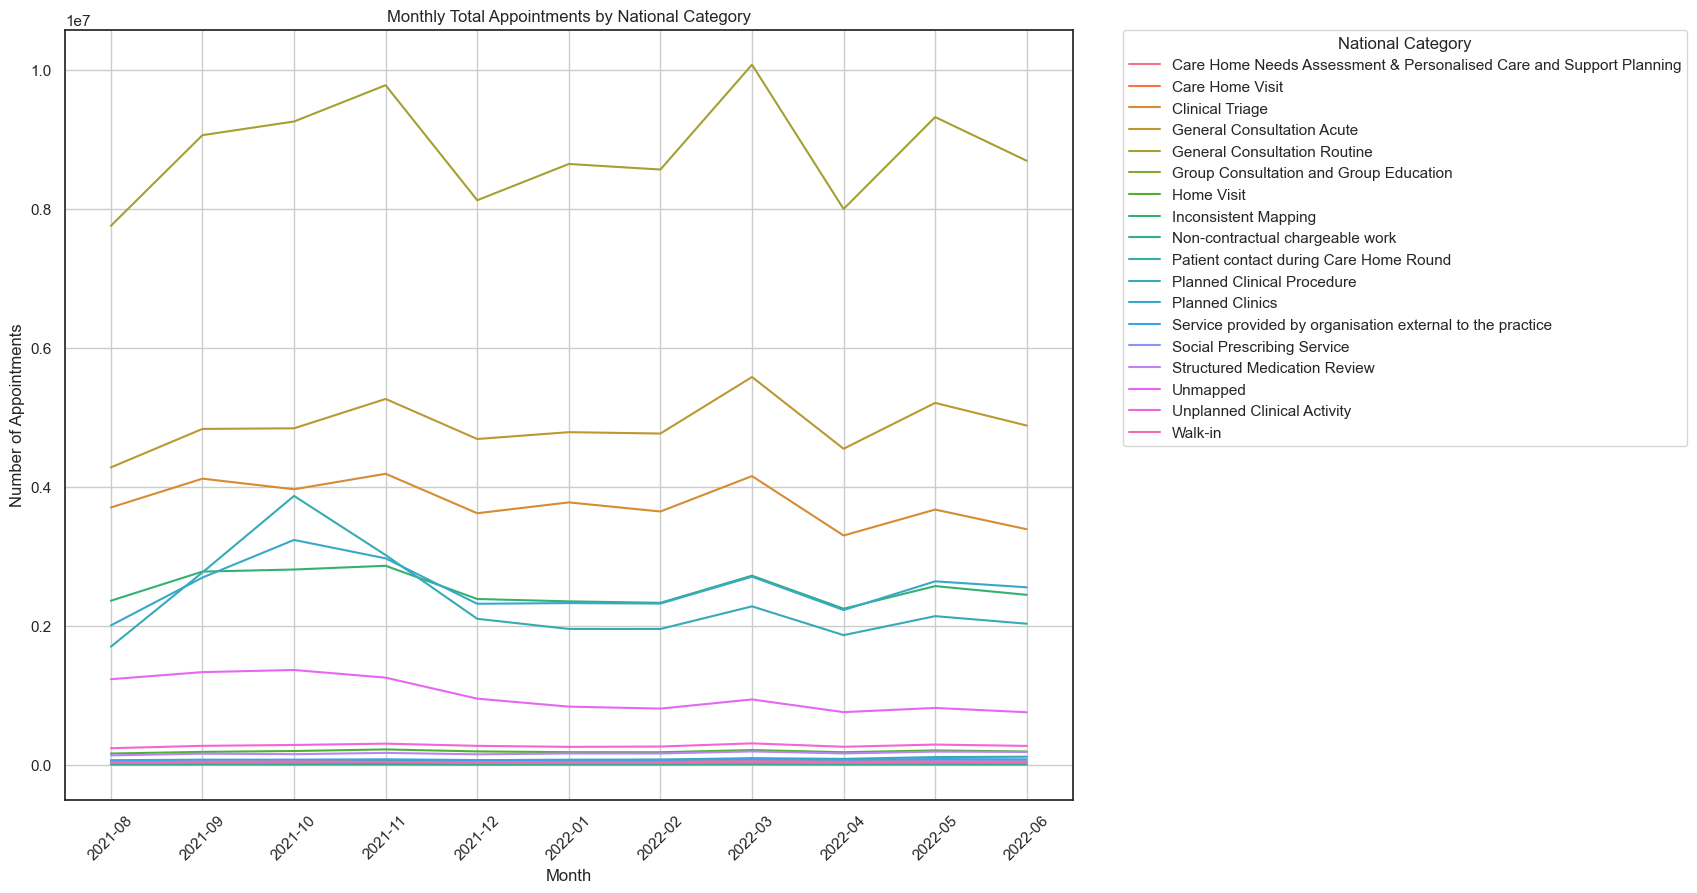

In [33]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.

# Set the white plot style
sns.set_style("white")

# Plot total appointments per month by context type
plt.figure(figsize=(13, 10))
sns.lineplot(data=nc_nc, x='appointment_month', y='count_of_appointments', hue='national_category')

plt.title('Monthly Total Appointments by National Category')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Save as PNG 
plt.savefig('monthly_appointments_national_category.png', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer (June to August 2021):**

In [34]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss_day.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


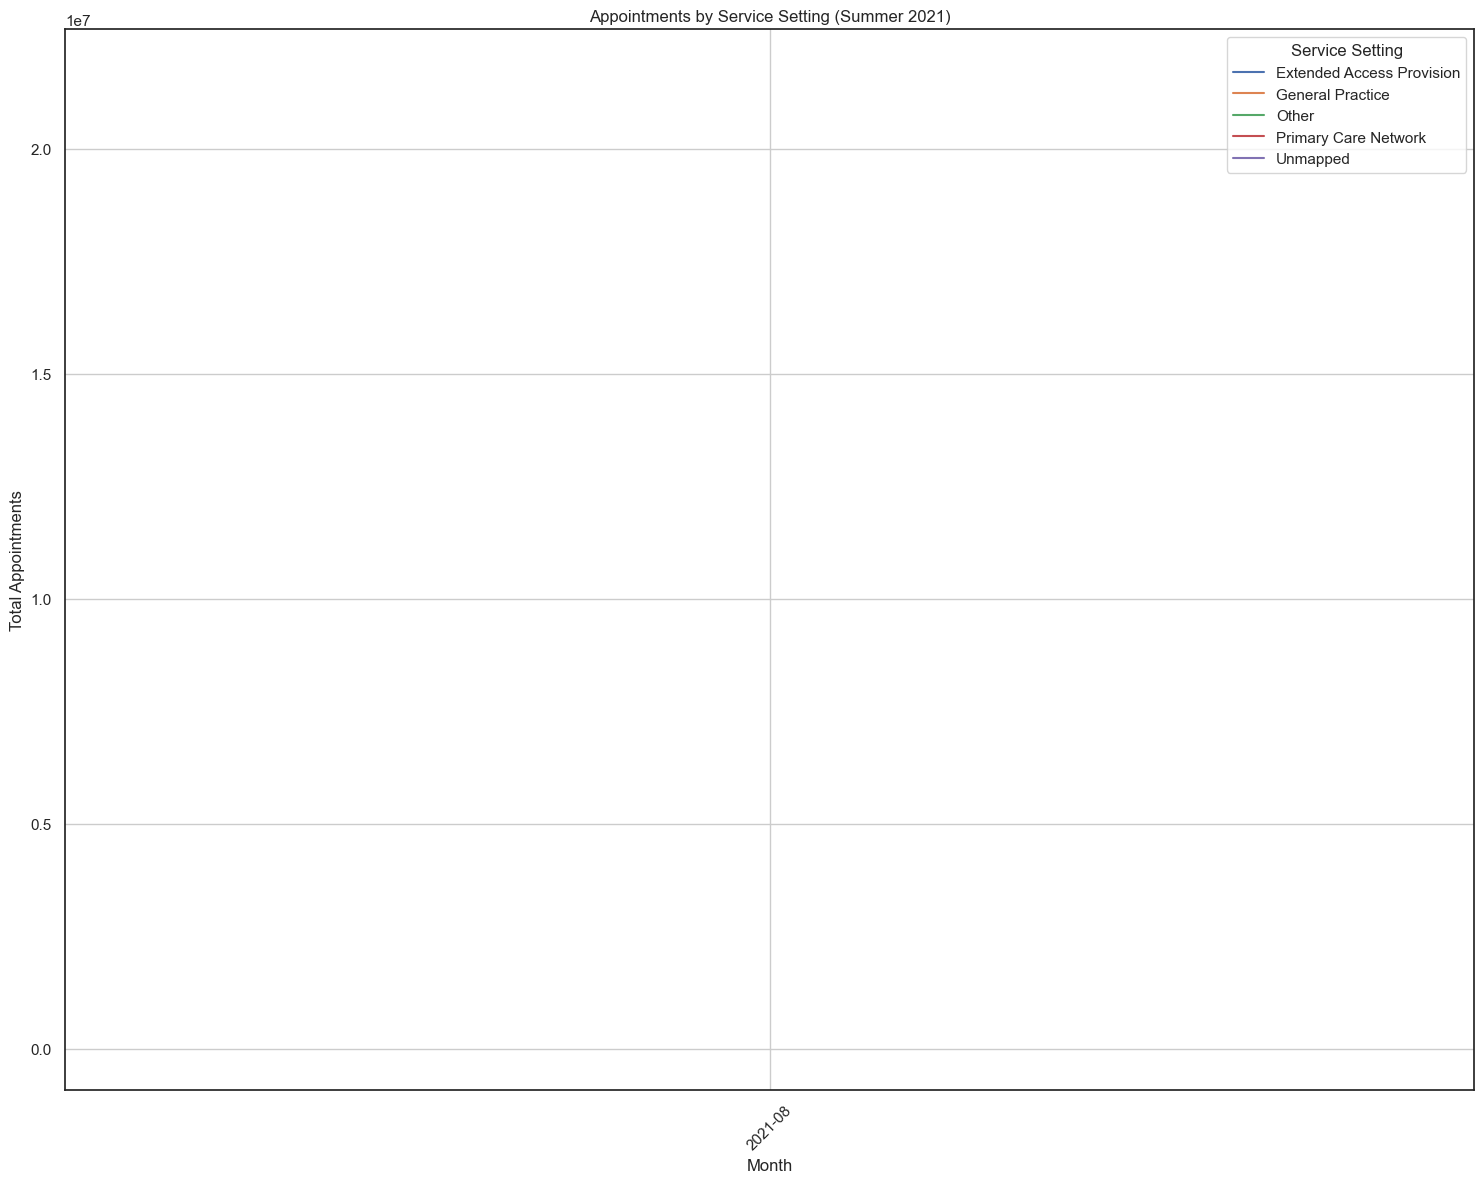

In [35]:
# Look at June to August 2021 in more detail to allow a closer look.
# Filter data for Summer 2021 (June to August)

summer = ['2021-06', '2021-07', '2021-08']

# Filter data for summer dates
summer_ss = nc_ss_day[nc_ss_day['appointment_month'].isin(summer)]

# Create a lineplot with the filtered data 
sns.lineplot(data=summer_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.title('Appointments by Service Setting (Summer 2021)')
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Service Setting')

# Show plot
plt.show()

No data is available for 2021-06 - 2021-07. Therefore this chart does not accurately reflect Summer 2021 at the NHS

**Autumn (September to November 2021):**

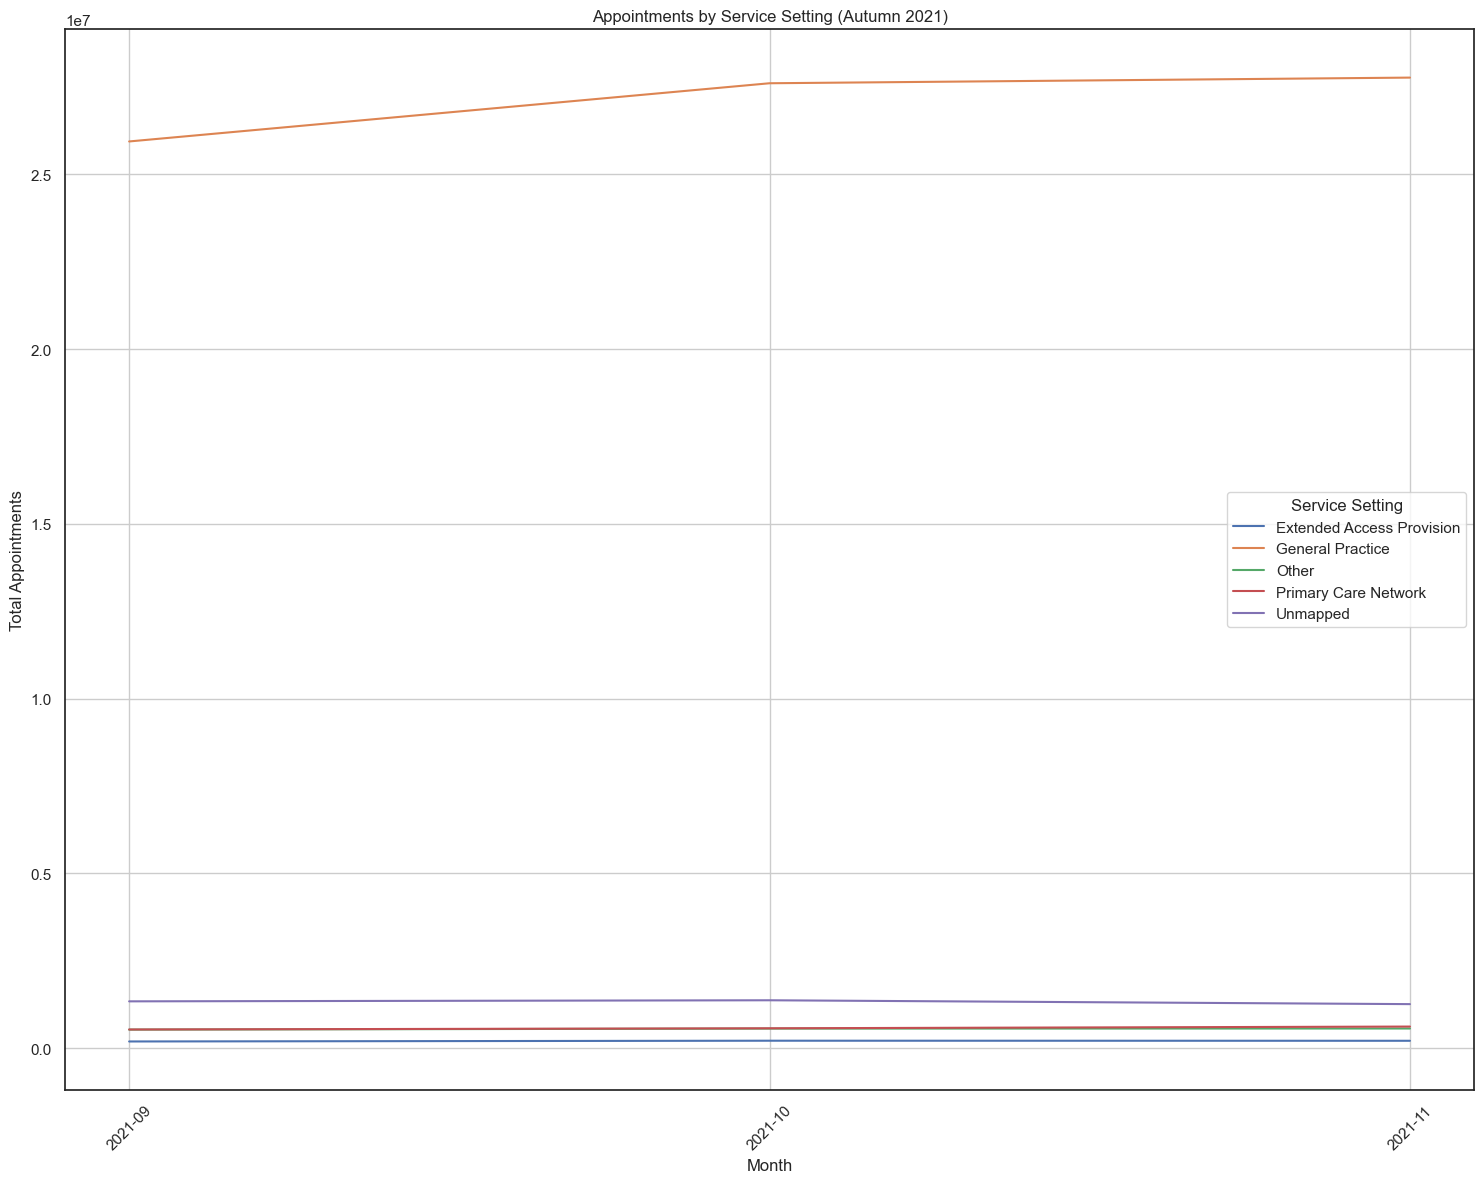

In [36]:
# Look at September to November 2021 in more detail to allow a closer look.

autumn = ['2021-09', '2021-10', '2021-11']

# Filter data for Autumn dates
autumn_ss = nc_ss_day[nc_ss_day['appointment_month'].isin(autumn)]

# Create a lineplot with the filtered data 
sns.lineplot(data=autumn_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Appointments by Service Setting (Autumn 2021)')
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Service Setting')

# Save as PNG 
plt.savefig('service_setting_autumn.png', dpi=300)

# Show plot
plt.show()

**Winter (December to February 2022):**

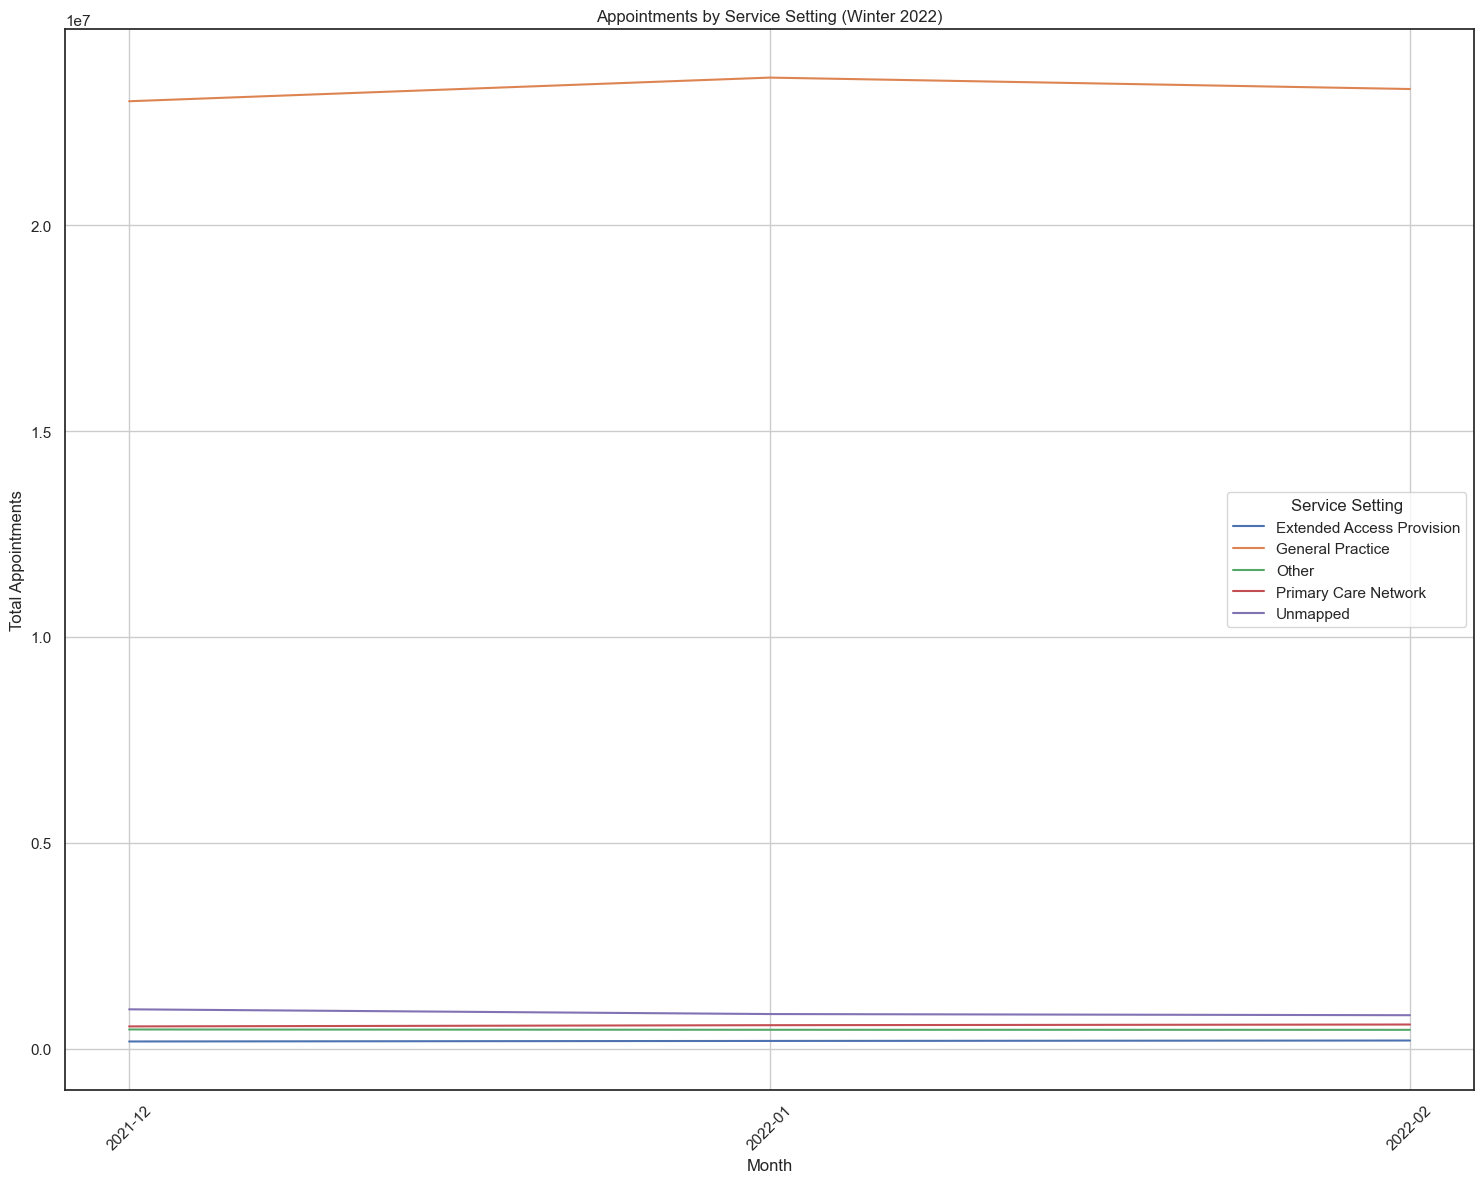

In [37]:
# Look at December to February 2022 in more detail to allow a closer look.

winter = ['2021-12', '2022-01', '2022-02']

# Filter data for Autumn dates
winter_ss = nc_ss_day[nc_ss_day['appointment_month'].isin(winter)]

# Create a lineplot with the filtered data 
sns.lineplot(data=winter_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Appointments by Service Setting (Winter 2022)')
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Service Setting')

# Save as PNG 
plt.savefig('service_setting_winter.png', dpi=300)

# Show plot
plt.show()

**Spring (March to May 2022):**

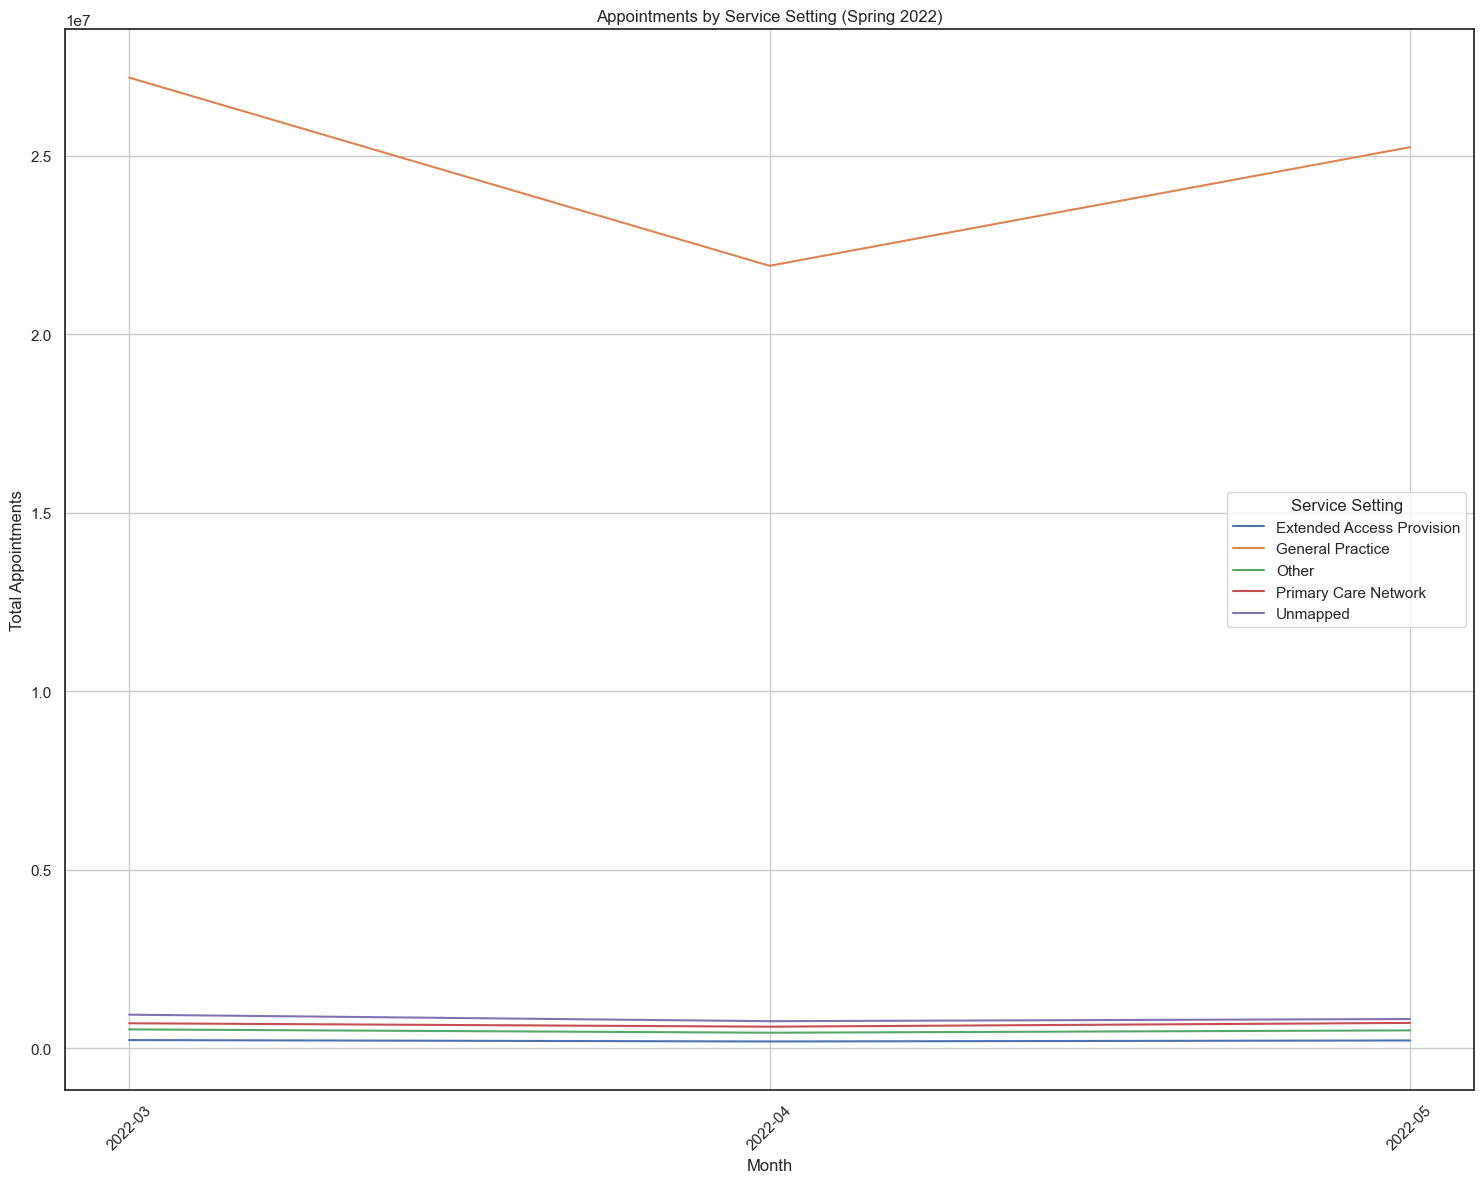

In [38]:
# Look at March to May 2022 in more detail to allow a closer look.

spring = ['2022-03', '2022-04', '2022-05']

# Filter data for Autumn dates
spring_ss = nc_ss_day[nc_ss_day['appointment_month'].isin(spring)]

# Create a lineplot with the filtered data 
sns.lineplot(data=spring_ss, x='appointment_month', y='count_of_appointments', hue='service_setting')

plt.title('Appointments by Service Setting (Spring 2022)')
plt.xlabel('Month')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend(title='Service Setting')

# Save as PNG 
plt.savefig('service_setting_spring.png', dpi=300)

# Show plot
plt.show()

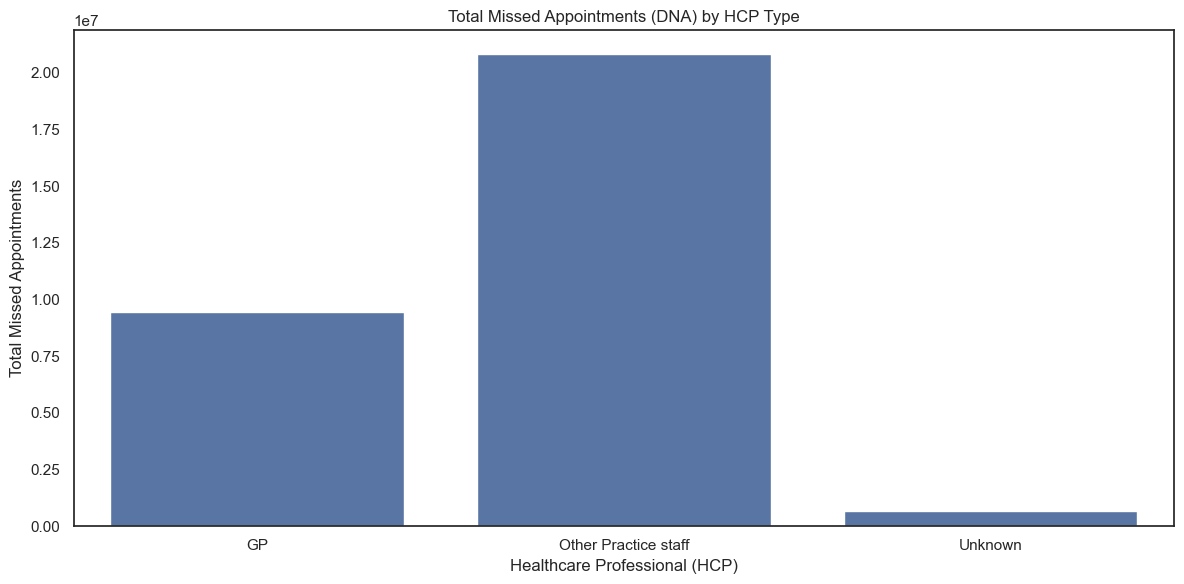

In [39]:
# Visualise which DNA appointments correspond to which HCP types. 

# Filter the data for 'DNA' appointment status 
ar_dna = ar[ar['appointment_status'] == 'DNA']

# Plot bar chart 
plt.figure(figsize=(12,6))
sns.barplot(data=ar_dna, x='hcp_type', y='count_of_appointments', estimator='sum', errorbar=None)

plt.title('Total Missed Appointments (DNA) by HCP Type')
plt.xlabel('Healthcare Professional (HCP)')
plt.ylabel('Total Missed Appointments')
plt.xticks(rotation=0)
plt.tight_layout()

# Save as PNG 
plt.savefig('DNA_appointments_HCP_type.png', dpi=300)

# Show plot
plt.show()

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [40]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [41]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
print(tweets.columns)
tweets.head()

(1174, 10)
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [42]:
# Explore the metadata.
tweets.dtypes

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object

In [43]:
# Explore the data set.
tweets.describe()
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [44]:
# Would it be useful to only look at retweeted and favourite tweet messages?

# Explore retweet counts
print("Retweet Count Distribution: ")
print(tweets['tweet_retweet_count'].value_counts().head())  # Show highest 5

print("\nFavorite Count Distribution: ")
print(tweets['tweet_favorite_count'].value_counts().head())  # Show highest 5

# Explain your answer.


Retweet Count Distribution: 
tweet_retweet_count
0    526
1    215
2    114
3     70
5     35
Name: count, dtype: int64

Favorite Count Distribution: 
tweet_favorite_count
0    1027
1      91
2      16
3      13
4       7
Name: count, dtype: int64


It would be useful to explore these columns furthere as they are direct indicators of audience engagement and tweet reach, and highly retweeted or favorited tweets can identify key/leading opinions regarding healthcare.

In [45]:
# Review the hashtags (#)
# Create a new DataFrame containing only the tweet text.
tweets_text = tweets[['tweet_full_text']].copy()

# View the DataFrame.
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [46]:
# Create a variable 'tags' and assign an empty list to it.
tags = []

# Loop through the messages, and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase
            tags.append(z.lower())

# Create series to count values in the list.
tags = pd.Series(tags).value_counts()

In [47]:
# Display the first 30 records (top 30 #'s).
tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [48]:
# Convert the series to a DataFrame in preparation for visualisation.
tweet_data = tags.reset_index()

# Rename the columns.
tweet_data.columns = ['word', 'count']

In [49]:
# Fix the count datatype (ensure it is an integer).
tweet_data['count'] = tweet_data['count'].astype(int)

# View the result.
tweet_data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [50]:
# Display records where the count is larger than 10.
filtered_tweet_data = tweet_data[tweet_data['count'] > 10]

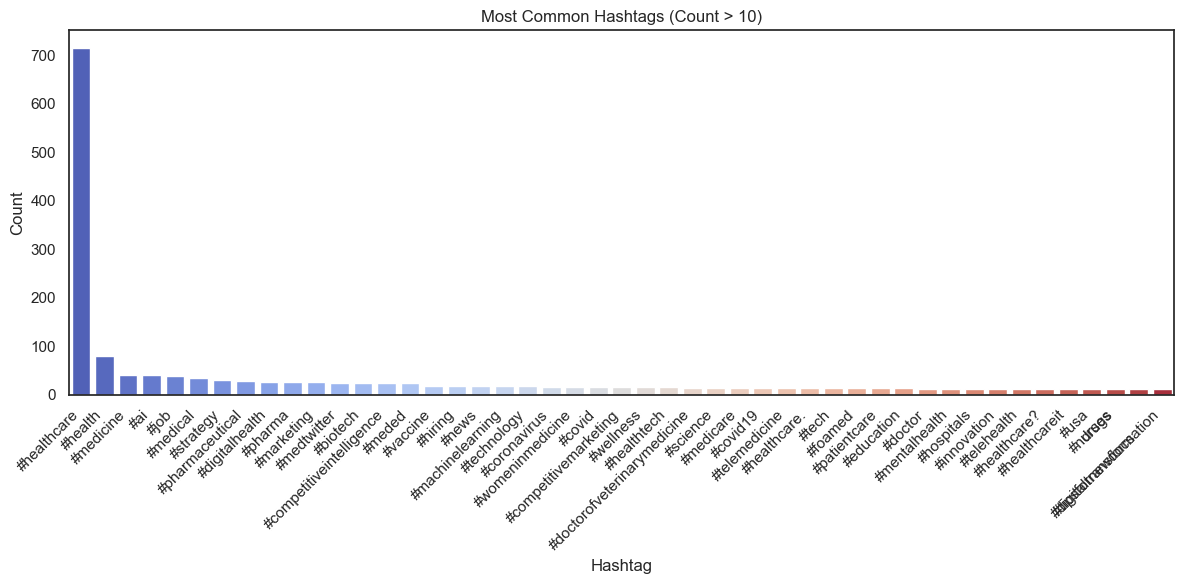

In [51]:
# Create a Seaborn barplot indicating records with a count >10 records.
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_tweet_data, x='word', y='count', palette = 'coolwarm')

plt.title('Most Common Hashtags (Count > 10)')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

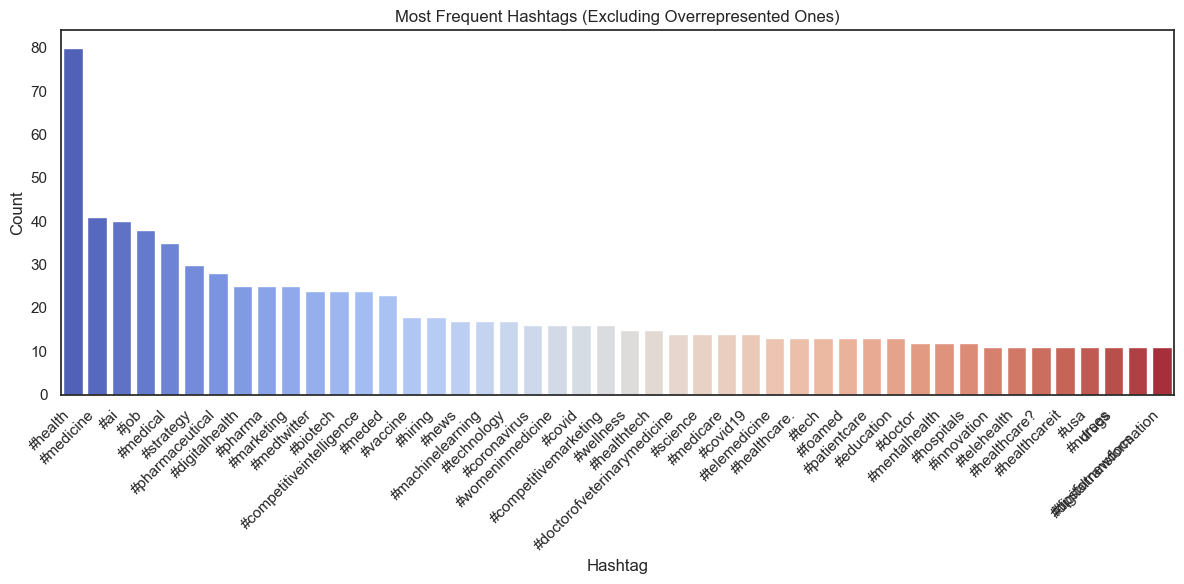

In [52]:
# Remove any overrepresented hashtags (remove anything over 100 # count).
filtered_tweet_data_2 = filtered_tweet_data[filtered_tweet_data['count'] < 100]

# Create a seaborn barplot displaying the remaining most frequently used hashtags (#).
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_tweet_data_2, x='word', y='count', palette='coolwarm')

plt.title('Most Frequent Hashtags (Excluding Overrepresented Ones)')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above barplots are useful, but include too many hashtags for an efficient visualization which can be considered too busy. As such, I am limiting my barplot to only show the top 20 hashtags, removing the top two overrepresented hashtags '#healthcare' and '#health'.

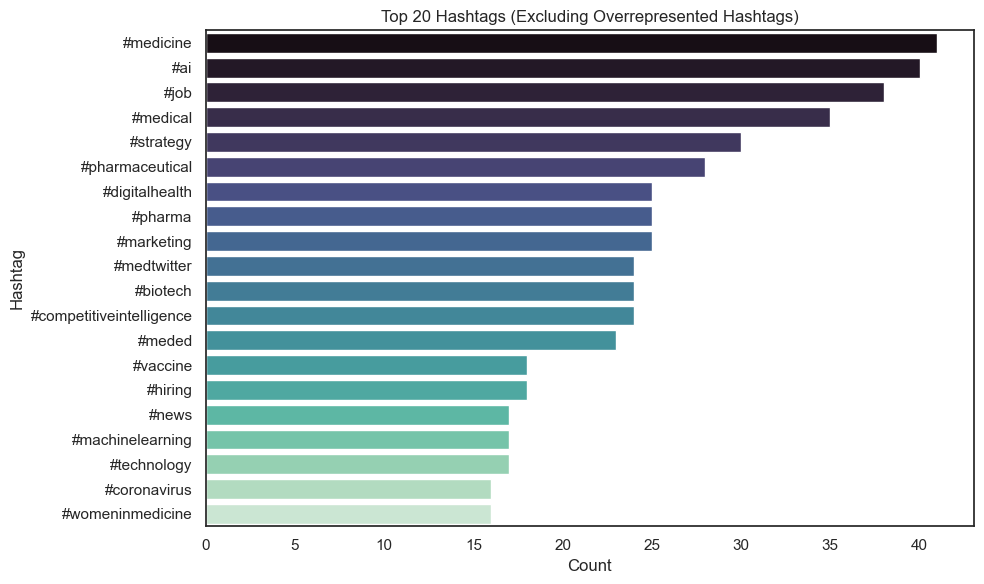

In [53]:
# Remove overrepresented hashtags from data set
filtered_hashtags = tweet_data.drop([0, 1]) # Remove '#healthcare' & 'health' rows

# Select top 20 hashtags
top_20 = filtered_hashtags.head(20)

# Plot the top 20 hashtags 
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_20, y='word', x='count', palette='mako')

# Setting plot labels and titles 
plt.title('Top 20 Hashtags (Excluding Overrepresented Hashtags)')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.tight_layout()

# Save as PNG 
plt.savefig('top_20_hashtags.png', dpi=300)

# Show plot
plt.show()

# 

# Assignment activity 6

### Make recommendations to the NHS. 

In [54]:
# Prepare your workstation.
# View the appointments_regional DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [55]:
print("Min date: ", ar['appointment_month'].min())
print("Max date: ", ar['appointment_month'].max())

Min date:  2020-01
Max date:  2022-06


In [56]:
# Filter the data set to only look at data from 2021-08 onwards.
# Ensure appointment_month is datetime format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

#Filter from August 2021 onwards
ar_new = ar[ar['appointment_month'] >= '2021-08']

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [57]:
# Create an aggregated data set to review the different features.
ar_agg = ar_new.groupby(
    ['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 
     'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08-01,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08-01,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08-01,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08-01,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08-01,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [58]:
# Determine the total number of appointments per month.
ar_df = ar_new.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
ar_df.rename(columns={'count_of_appointments':'monthly_appointments'}, inplace=True)

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = (ar_df['monthly_appointments']/30)/1_200_000

# Round the utilisation value to one decimal place
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame.
ar_df.head()

,appointment_month,monthly_appointments,utilisation
0,2021-08-01,23852171,0.7
1,2021-09-01,28522501,0.8
2,2021-10-01,30303834,0.8
3,2021-11-01,30405070,0.8
4,2021-12-01,25140776,0.7


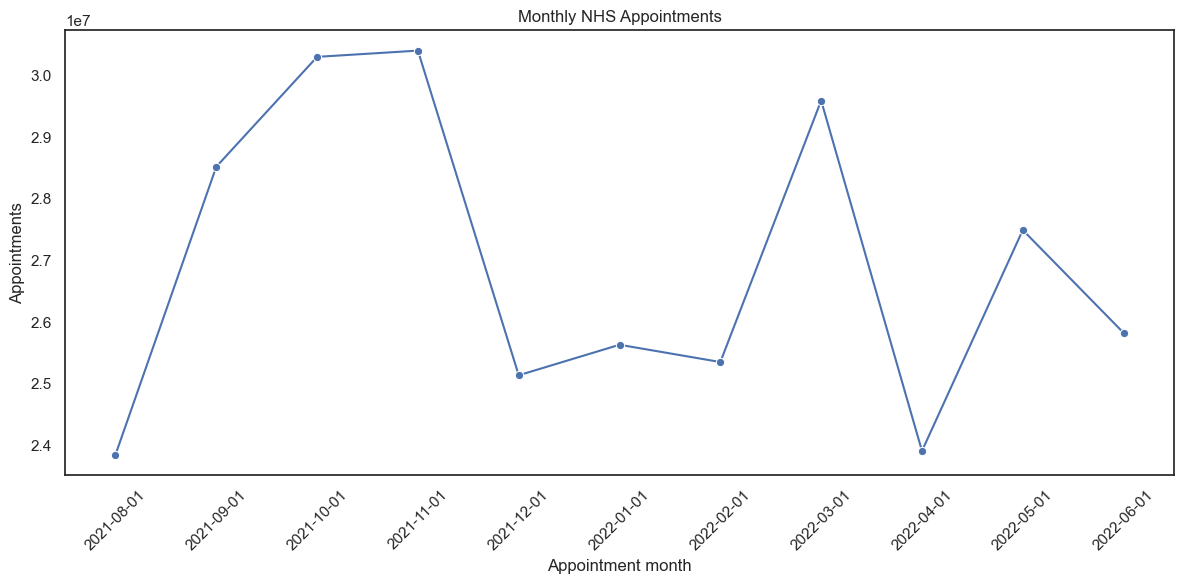

In [59]:
# Plot sum of count of monthly visits.

# Convert the appointment_month to string data type for ease of visualisation.
ar_agg['appointment_month'] = ar_agg['appointment_month'].astype(str)
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)


# Create a lineplot with Seaborn.
plt.figure(figsize=(12, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='monthly_appointments', marker='o')
plt.title('Monthly NHS Appointments')
plt.ylabel('Appointments')
plt.xlabel('Appointment month')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as PNG 
plt.savefig('monthly_nhs_appointments.png', dpi=300)

# Show plot
plt.show()

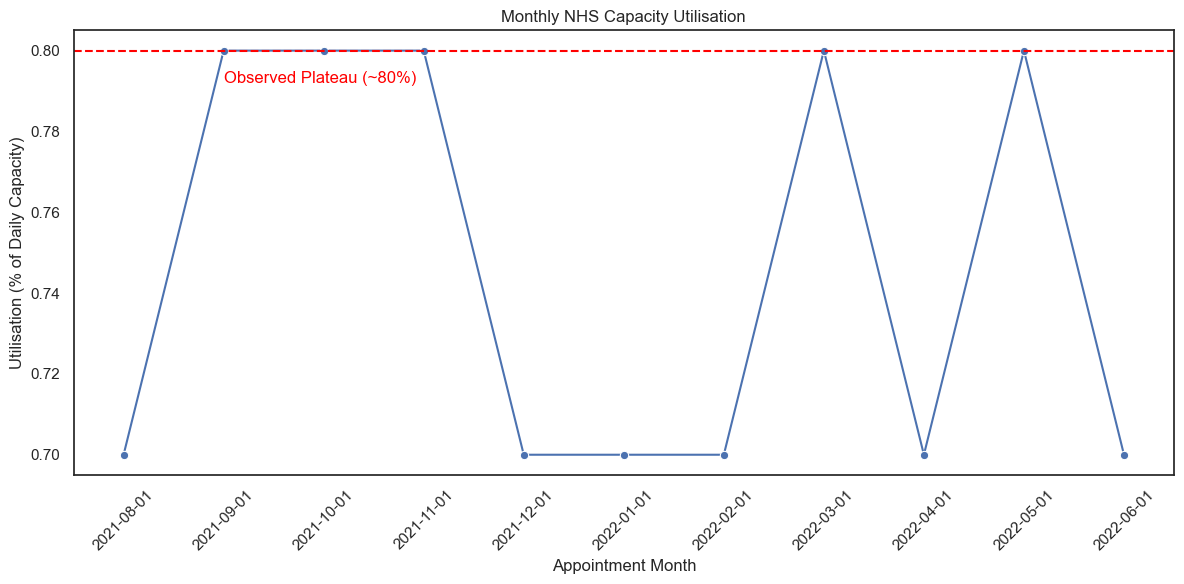

In [60]:
# Plot monthly capacity utilisation.
# Create a lineplot.
plt.figure(figsize=(12, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation', marker='o')
plt.title('Monthly NHS Capacity Utilisation')
plt.ylabel('Utilisation (% of Daily Capacity)')
plt.xlabel('Appointment Month')
plt.xticks(rotation=45)
plt.tight_layout()

# Add horizontal line and label to highlight observed plateau at 80%
plt.axhline(0.80, color='red', linestyle='--')
plt.text(x=1, y=0.792, s='Observed Plateau (~80%)', color='red')

# Save as PNG 
plt.savefig('monthly_utilisation.png', dpi=300)

# Show plot
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

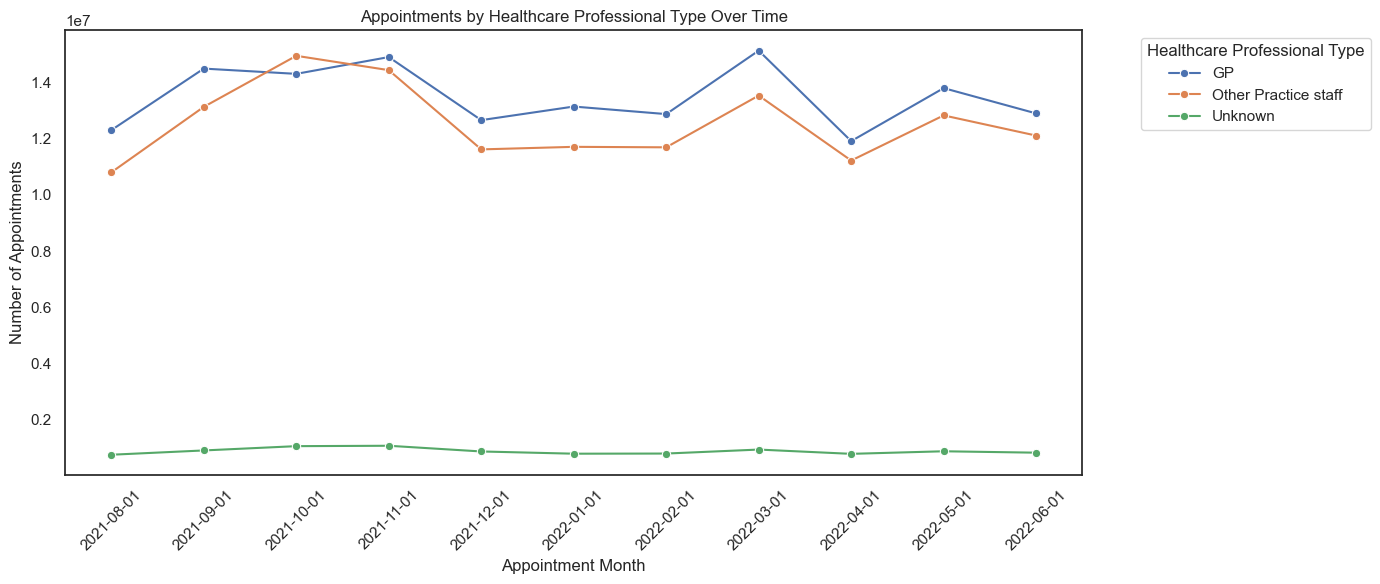

In [61]:
# Create an aggregated data set to review the different HCP types over time.
hcp_monthly = ar_new.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Convert appointment_month to String for clearer axis labels 
hcp_monthly['appointment_month'] = hcp_monthly['appointment_month'].astype(str)

# Create a line plot to answer the question.
plt.figure(figsize=(14, 6))
sns.lineplot(data=hcp_monthly, x='appointment_month', y='count_of_appointments', hue='hcp_type', marker='o')

plt.title('Appointments by Healthcare Professional Type Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Healthcare Professional Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save as PNG 
plt.savefig('appointments_by_HCP_time.png', dpi=300)

# Show plot
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

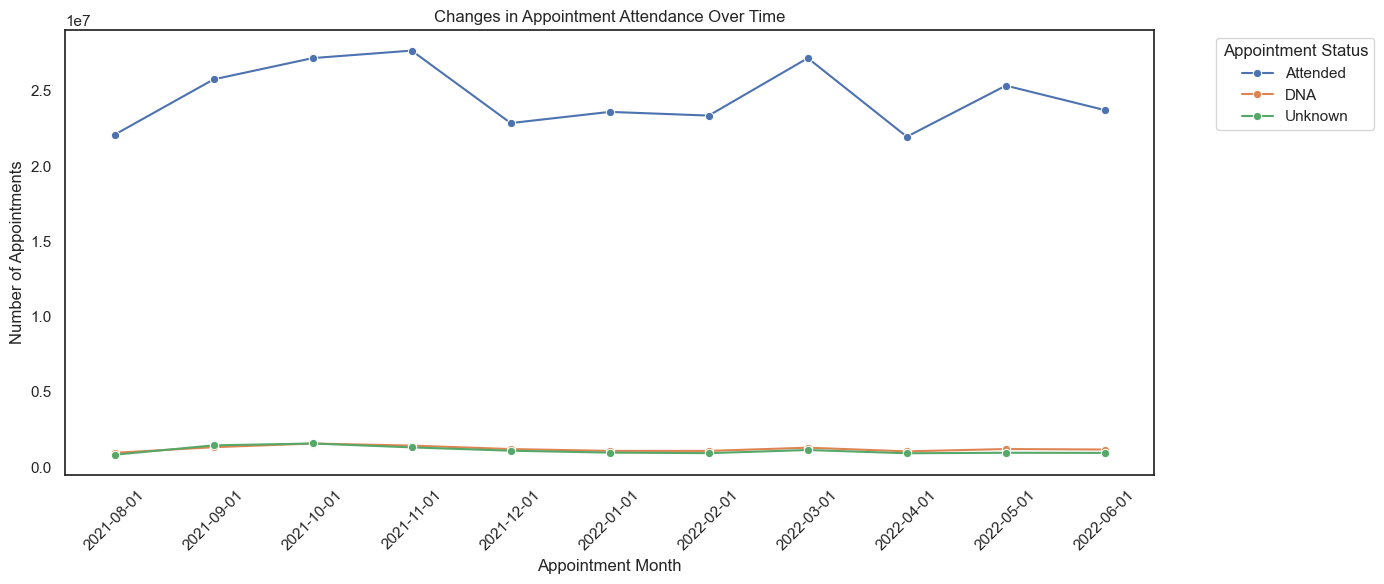

In [66]:
# Create an aggregated data set to review the different HCP types over time.
status_monthly = ar_new.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Convert appointment_month to String for clearer axis labels 
status_monthly['appointment_month'] = status_monthly['appointment_month'].astype(str)

# Create a line plot to answer the question.
plt.figure(figsize=(14, 6))
sns.lineplot(data=status_monthly, 
             x='appointment_month', 
             y='count_of_appointments', 
             hue='appointment_status', 
             marker='o')

plt.title('Changes in Appointment Attendance Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save as PNG 
plt.savefig('appointment_attendance_overtime.png', dpi=300)

# Show plot
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

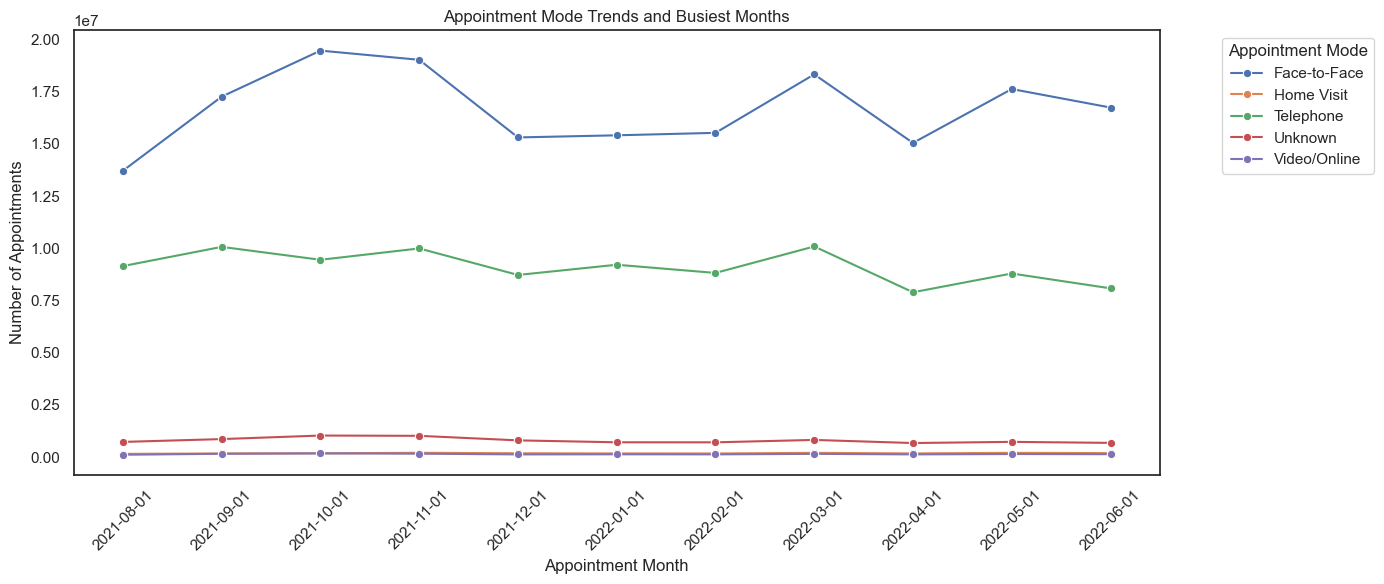

In [68]:
# Create an aggregated data set to review appointment modes and volume over time.
mode_monthly = ar_new.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Convert appointment_month to String for clearer axis labels 
mode_monthly['appointment_month'] = mode_monthly['appointment_month'].astype(str)

# Create a line plot to answer the question.
plt.figure(figsize=(14, 6))
sns.lineplot(data=mode_monthly,
             x='appointment_month',
             y='count_of_appointments',
             hue='appointment_mode',
             marker='o')

plt.title('Appointment Mode Trends and Busiest Months')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save as PNG 
plt.savefig('appointment_mode_overtime.png', dpi=300)

# Show plot
plt.show()

**Question 5:** Are there any trends in time between booking and appointment?

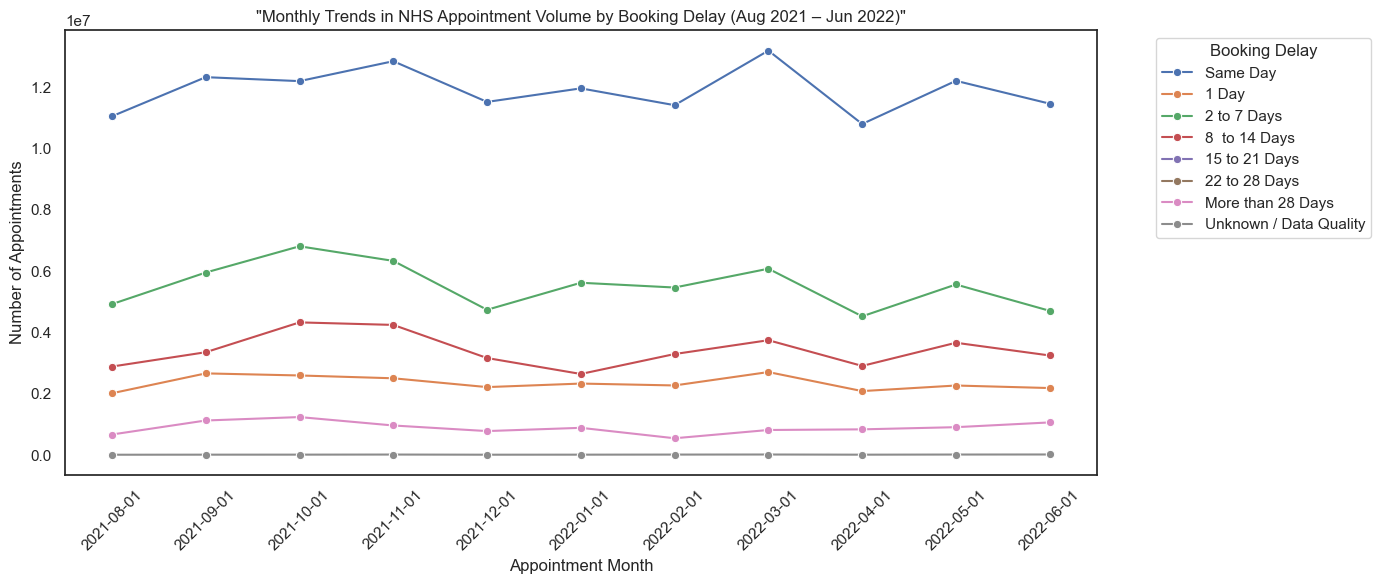

In [69]:
# Create an aggregated data set to review appointment modes and volume over time.
booking_delay_monthly = ar_new.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Convert appointment_month to String for clearer axis labels 
booking_delay_monthly['appointment_month'] = booking_delay_monthly['appointment_month'].astype(str)

# Set legend order 
legend_order = [
    'Same Day',
    '1 Day',
    '2 to 7 Days',
    '8  to 14 Days',
    '15 to 21 Days',
    '22 to 28 Days',
    'More than 28 Days',
    'Unknown / Data Quality'
]

# Create a line plot to answer the question.
plt.figure(figsize=(14, 6))
sns.lineplot(data=booking_delay_monthly,
             x='appointment_month',
             y='count_of_appointments',
             hue='time_between_book_and_appointment',
             hue_order=legend_order, # Apply custom legend
             marker='o')

plt.title('"Monthly Trends in NHS Appointment Volume by Booking Delay (Aug 2021 – Jun 2022)"')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.legend(title='Booking Delay', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save as PNG 
plt.savefig('booking_delay_appointment_volume.png', dpi=300)

# Show plot
plt.show()

**Question 6:** How do the various service settings compare?

In [70]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,Year,Month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08,2021,8
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08,2021,8
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08,2021,8
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08,2021,8
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08,2021,8


In [71]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_monthly = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# View the DataFrame.
nc_monthly.head()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


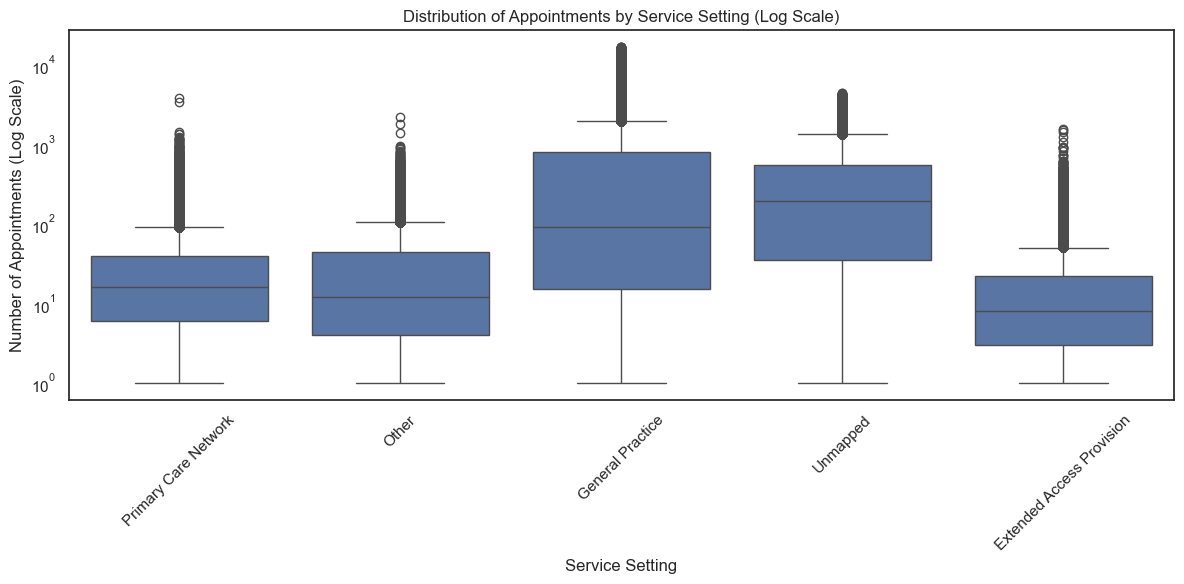

In [72]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.
plt.figure(figsize=(12, 6))

sns.boxplot(data=nc, x='service_setting', y='count_of_appointments')
plt.yscale('log')
plt.title('Distribution of Appointments by Service Setting (Log Scale)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as PNG 
plt.savefig('appointment_distrubition_gp_no_outliers.png', dpi=300)

# Show plot
plt.show()

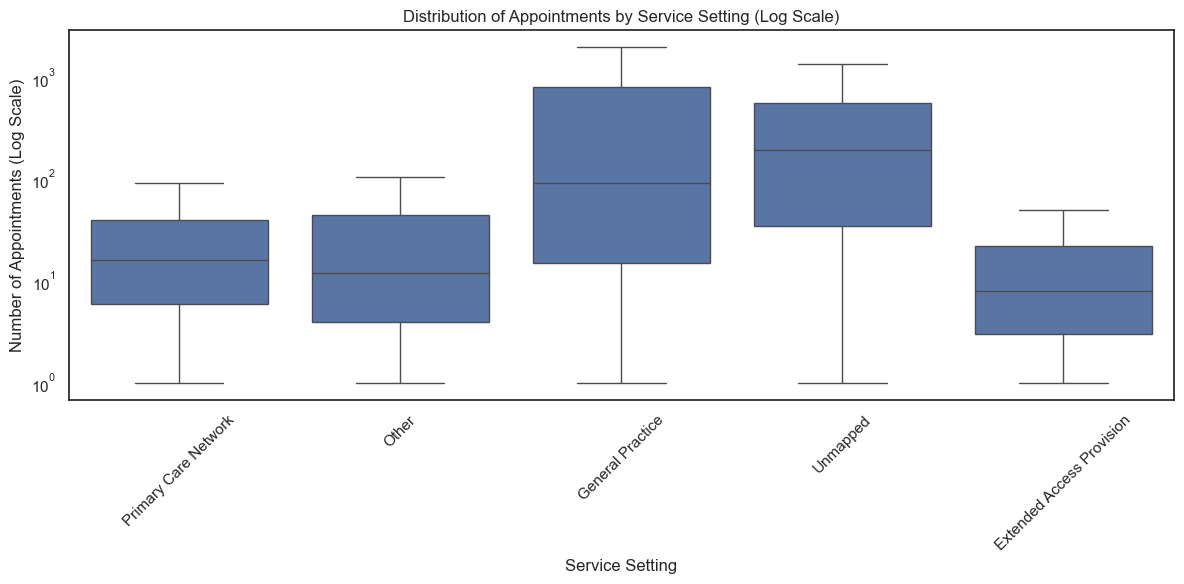

In [73]:
# Create the same boxplot as above, without outliers, for ease of visualisation for stakeholders when presenting the data.
plt.figure(figsize=(12, 6))

sns.boxplot(data=nc, x='service_setting', y='count_of_appointments', showfliers=False)  # hides the outlier points
plt.yscale('log')
plt.title('Distribution of Appointments by Service Setting (Log Scale)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save as PNG 
plt.savefig('appointment_distrubition_gp_no_outliers.png', dpi=300)

# Show plot
plt.show()

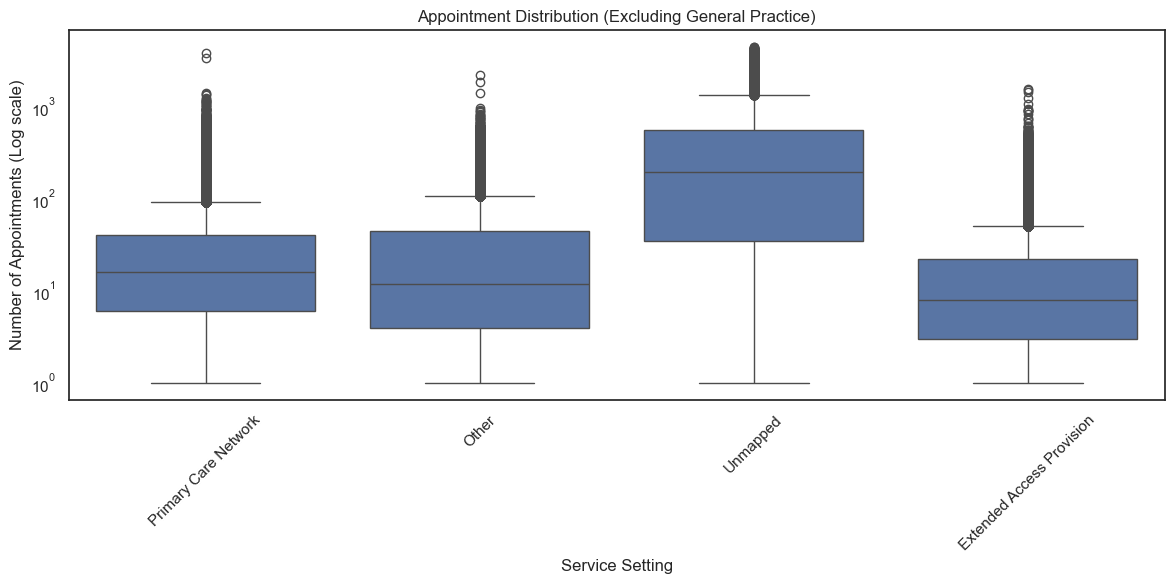

In [74]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.
# Filter out GP service setting
nc_filter = nc[nc['service_setting'] != 'General Practice']

plt.figure(figsize=(12, 6))
sns.boxplot(data=nc_filter, x='service_setting', y='count_of_appointments')
plt.title('Appointment Distribution (Excluding General Practice)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments (Log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
# Apply log scale to y-axis
plt.yscale('log')

# Save as PNG 
plt.savefig('appointment_distribution.png', dpi=300)

# Show plot
plt.show()

# 

### Provide a summary of your findings and recommendations based on the analysis.

**Has there been adequate staff and capacity in the NHS networks?**

Utilisation remained between 70% and 80%, below the NHS's estimated maximum daily capacity — suggesting no system-wide overload.
The plateau at 80% over multiple months reflects a possible operational ceiling, likely driven by staffing or resource constraints, not reduced demand.
Consistent underutilisation indicate that the NHS may be operating below its true potential, likely due to limited staff availability, burnout, or system inefficiencies.

**Recommendations**

Increase staffing flexibility where feasible — such as hiring bank staff, extending service hours, or rebalancing appointment modes (e.g., remote consultations) to absorb more demand.
Look into causes of underutilisation during specific months, especially periods with dips to 70%, to assess if short-term interventions (e.g., seasonal staff) could improve throughout.

**Are missed appointments a significant issue?**

Consistent Missed Appointment Rate: DNA rates stay between 4.0% and 5.2% monthly between Aug 2021 - Jun 2022.
Significant system impact: With over 25 million appointments monthly, 4-5% translates to around 1 million missed appointments each month. 

**Recommendations**

Enhance reminder systems, such as introducing or expanding SMS or email reminders for patients.
Enabling easy cancellation, simplifying tools to cancel or reschedule to reduce unintentional DNAs.
Further investigation into data tracking DNA trends by region, patient demographics, or ICB-locations.

**Can/should external social media data be used for decision-making?**

Data is inconclusive, social media data needs to be re-examined using more specific set, tweets that include the ‘#NHS’ hashtag, for example. 

